# Załadowanie bibliotek, oraz danych

Wykorzystujemy tutaj biblioteki: pandas, matplotlib, seaborn, sklearn, oraz zbioru danych Iris.

Tworzymy następnie dataframe, któremu przypisujemy kolumny, oraz pod koniec sprawdzamy czy dane są wyświetlane prawidłowo wyciągając 5 pierwszych próbek z dataframe'u.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Dodanie kolumny z rodzajem kwiatu

Następnie tworzymy swoje własne nazwy kolumn, aby dało się do nich odwoływać w kodzie. Dodajemy dodatkową kolumnę o nazwie variety, która będzie posiadała rodzaj irysa w postaci liczby 0 - setosa, 1 - versicolor, 2 - virginica.


In [26]:
df['target'] = iris.target

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Podzielenie danych na X i y

Kolejnym krokiem jest rozdzielenie danych na argumenty, oraz wartości. X to jest nasz cały dataframe ale bez ostatniej kolumny, dlatego właśnie używamy df.drop do usunięcia ostatniej kolumny, którą następnie przypisujemy do zbioru wartości y.


In [27]:
X = df.drop(['variety'], axis=1)
y = df['variety']

# Podzielenie danych na dane treningowe, oraz na dane testowe

Kolejnym krokiem jest podzielenie naszych danych na dane treningowe, oraz na dane testowe. Wykorzystujemy do tego funkcję train_test_split z biblioteki sklearn, którą wykorzystujemy podając trzy argumenty. Jest to X, y, oraz test_size który jest liczbą z zakresu od 0.0 - 1.0 i mówi o tym w jakiej proporcji chcemy podzielić dane. W naszym przypadku dzielimy dane tak, żeby 30% z nich było danymi na których nasz model będzie testowany. Dostajemy w ten sposób cztery tablice danych X_train, X_test, y_train i y_test, które wykorzystamy później. Wybieramy też opcję random_state=42 dla powtarzalności wyników.


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Przeskalowanie danych

Teraz, należy wykorzystać scaler (w naszym przypadku StandardScaler z biblioteki sklearn), który ma na celu przeskalowania naszych danych żeby zminimalizować ilość mocno odbiegających od siebie danych żeby je "wygładzić". Wykonanie tej operacji sprawi, że nasz model będzie szybszy oraz mniej podatny na bardzo zróżnicowane wyniki.


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Nakarmienie modelu danymi treningowymi

Gdy dane zostały już prawidłowo przygotowane, można wykorzystać algorytm Gaussowego Naiwnego Klasyfikatora Bayesa do nauczenia naszego modelu na podstawie tych danych. Robimy to najpierw importując odpowiedni algorytm, a potem tworząc obiekt klasyfikatora gnb, na którym wykorzystamy metodę fit. Metoda ta przyjmuje dwa argumenty, do której aplikujemy nasze dane X_train, oraz y_train na których nasz model się będzie uczył i następnie obiekt gnb będzie posiadał w swoich atrybutach informacje dzięki którym będzie mógł później wykonywać przewidywania.


In [30]:
from GaussianNaiveBayesClassifier import GaussianNaiveBayesClassifier

gnb = GaussianNaiveBayesClassifier()

gnb.fit(X_train, y_train)

# Wykonanie przewidywań na wyuczonym modelu

W tym kroku wykonujemy na obiekcie klasyfikatora metodę predict z argumentem X_test, i przypisujemy rezultat do zmiennej y_pred. Można to sobie wyobrazić tak, że X_test jest dla naszego obiektu testem sprawdzającym wiedzę, a y_pred to są jego odpowiedzi na ten test. W tym miejscu algorytm na podstawie poprzedniego wywołania metody fit ma podstawy do "rozwiązania" tego testu.


In [31]:
y_pred = gnb.predict(X_test)

# Sprawdzenie dokładności, oraz testowanie czy istnieje overfitting lub underfitting

Gdy już wykonaliśmy wszystkie operacje przewidujące, należy sprawdzić dokładność modelu i wykrycia czy istnieje tzw. overfitting lub underfitting czyli przeuczenie, bądź niedouczenie. Żeby to zrobić, wykonujemy na obiekcie gnb metodę score przyjmującą dwa argumenty X i y, osobno dla danych treningowych, oraz dla danych testowych i sprawdzamy czy wyniki są do siebie zbliżone. Jeżeli byłyby bardzo daleko od siebie to mogłoby to sugerować overfitting lub underfitting, zależnie od tego które były większe, a które mniejsze. Na podstawie naszego modelu widać że dane są do siebie bardzo zbliżone, z czego możemy wynieść wniosek, że nasz model działa prawidłowo.


In [32]:
print('Wynik danych treningowych: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Wynik danych testowych: {:.4f}'.format(gnb.score(X_test, y_test)))

Wynik danych treningowych: 0.9429
Wynik danych testowych: 0.9778


### Obliczenie precyzji modelu

Aby sprawdzić, jak dobrze model klasyfikuje próbki, obliczamy precyzję dla każdej klasy. W tym celu używamy `precision_score` z `sklearn`. Precyzja to stosunek liczby True Positives (TP) do sumy TP i False Positives (FP):

#### Wynik:

`Precyzja dla każdej klasy: [1.         1.         0.92857143]`

- Klasa 0: Precyzja **1.0** – brak błędnych przypisań.
- Klasa 1: Precyzja **1.0** – brak błędnych przypisań.
- Klasa 2: Precyzja **0.92** – nieco więcej błędnych przypisań.

Wysoka precyzja wskazuje, że model rzadko błędnie przypisuje próbki do danej klasy.


In [33]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average=None)

print("Precyzja dla każdej klasy:", precision)

Precyzja dla każdej klasy: [1.         1.         0.92857143]


# Wykorzystanie macierzy konfuzji do narysowania wykresu ciepłowego

Innym sposobem do lepszej wizualizacji poprawności modelu jest wykorzystanie macierzy konfuzji która ma na celu pokazania nam, dokładnie w których miejscach nasz model się pomylił lub miał rację, to znaczy każdego typu kwiatów który model uznał za prawidłowy jest podany typ kwiatu, który był do zgadnięcia i potem jest to sumowane żeby zdobyć ogólny obraz. Na podstawie naszej macierzy można zauważyć, że w większości przypadków nasz model miał rację i pomylił się tylko jednokrotnie, gdyż próbował przypisać kwiatu Versicolor kwiat Virginica co jest oczywiście błędne.


<Axes: >

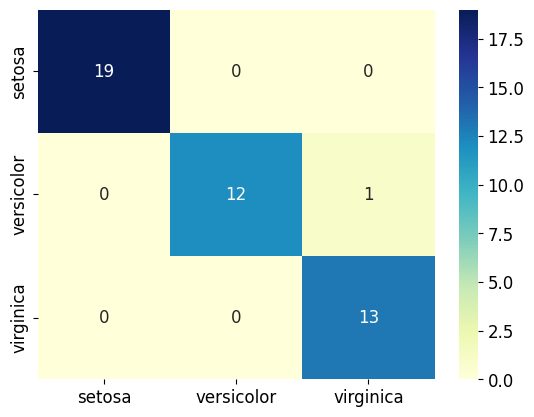

In [34]:
from sklearn.metrics import confusion_matrix

class_names = iris.target_names

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=class_names, index=class_names)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Metoda predict_proba

Możemy też wykorzystać metodę predict_proba na obiekcie modelu, która oblicza jakie było prawdopodobieństwo tego, że wybrany kwiat należy do danej kategorii. Na podstawie wyświetlonego dataframe'u można dojść do wniosku, że w wielu przypadkach prawdopodobieństwo było tak duże że jest praktycznie pewne, a w niektórych tak małe że jest praktycznie niemożliwe.


In [35]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

class_labels = sorted(gnb.classes)

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=class_labels)

y_pred_prob_df

,0,1,2
0,4.158701e-88,9.955278e-01,4.472165e-03
1,1.000000e+00,1.310311e-13,2.217720e-20
2,9.830853e-285,2.701383e-12,1.000000e+00
3,9.547171e-92,9.748614e-01,2.513857e-02
4,1.086763e-103,8.319107e-01,1.680893e-01
5,1.000000e+00,6.776933e-13,7.148908e-21
6,2.799808e-51,9.999639e-01,3.607492e-05
7,3.471082e-172,4.260991e-07,9.999996e-01
8,8.873981e-94,9.935781e-01,6.421885e-03
9,1.015240e-57,9.999529e-01,4.711523e-05


# Przypisz prawdopodobieństwa i narysuj wykresy

Ostatnim sposobem do ewaluacji danych w tym przykładzie jest narysowanie wykresu na podstawie wspomnianej wcześniej metody predict_proba. Tworzymy macierz na podstawie tych wyników oraz przypisujemy każdej zmiennej y, kolumnę macierzy która odpowiada za rodzaj kwiatu. Następnie rysujemy histogram za pomocą biblioteki matplotlib. Na podstawie histogramu można wyciągnąć wniosek, że większość rozkładu znajduje się w pobliżu 0, oraz w pobliżu 1, czyli tak jak wspomniałem wcześniej prawdopodobieństwo w znacznej ilości przypadków było pewne, a tylko w niektórych rozłożonych w środku były jakieś wahania co mogło sprawić że nasz model się mógł pomylić.


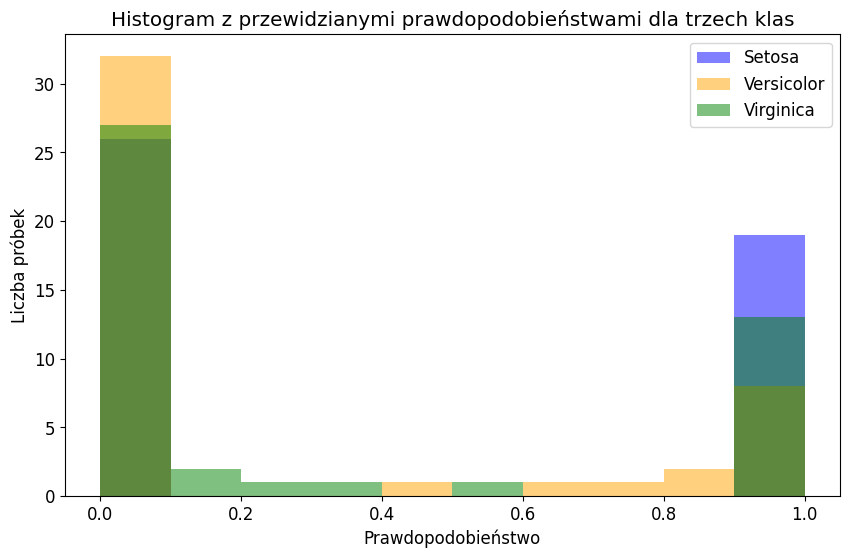

In [36]:
import numpy as np

proba_matrix = np.array([list(probs.values()) for probs in gnb.predict_proba(X_test)])

y_pred_setosa = proba_matrix[:, 0]
y_pred_versicolor = proba_matrix[:, 1]
y_pred_virginica = proba_matrix[:, 2]

plt.rcParams['font.size'] = 12

plt.figure(figsize=(10, 6))

plt.hist(y_pred_setosa, bins=10, alpha=0.5, label='Setosa', color='blue')
plt.hist(y_pred_versicolor, bins=10, alpha=0.5, label='Versicolor', color='orange')
plt.hist(y_pred_virginica, bins=10, alpha=0.5, label='Virginica', color='green')

plt.title('Histogram z przewidzianymi prawdopodobieństwami dla trzech klas')
plt.xlabel('Prawdopodobieństwo')
plt.ylabel('Liczba próbek')
plt.legend()

plt.show()


# Podsumowanie

Podsumowując, wykorzystaliśmy dane ze zbioru danych IRIS przedstawiające próbki z trzema rodzajami irysów. Następnie przygotowaliśmy dane w taki sposób, aby były kompatybilne z naszym modelem i dało się na nich operować. Potem wykorzystaliśmy te dane na na naszym Naiwnym Klasyfikatorze Bayesowym Gaussa za pomocą metody fit, w celu nauczenia go na podstawie tych danych. Na tak nauczonym modelu, mogliśmy użyć metody predict, do przetestowania naszego modelu na podstawie zbioru danych testowych. Potem wykonaliśmy ewaluację naszych wyników i sprawdziliśmy czy są one wiarygodne, oraz czy nasz model działa poprawnie. Na podstawie wysokiej precyzji, oraz braku oznak overfittingu i underfittingu można uznać że nasz model działa prawidłowo i może być godnym zaufania źródłem przewidywań statystycznych.
